In [25]:
import matplotlib.pyplot as plt                 # Библеотека для работы с графиками
from tensorflow.keras.datasets import mnist     # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255

y_test_cat = keras.utils.to_categorical(y_test, 10)
y_train_cat = keras.utils.to_categorical(y_train, 10)



In [27]:
model = keras.Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.15),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

In [28]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

import extensionbase

sd = 25
gen = extensionbase.gen_extension_base(x_train, y_train, size_drop=sd)

ah = []
av = []

for j in range(2):
    for i in range(sd):
        x, y = next(gen)
        g = model.fit(x, y, batch_size=77, validation_split=0.25, shuffle=True, )
        ah.append(g.history["accuracy"])
        av.append(g.history["val_accuracy"])
    print(j, i)


1800/1800 [==============================] - 22s 12ms/step - loss: 0.1905 - accuracy: 0.9383 - val_loss: 0.0858 - val_accuracy: 0.9777
0 0
1800/1800 [==============================] - 23s 13ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1366 - val_accuracy: 0.9727
0 1
1800/1800 [==============================] - 22s 12ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.1452 - val_accuracy: 0.9716
0 2
1800/1800 [==============================] - 22s 12ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.1001 - val_accuracy: 0.9740
0 3
1800/1800 [==============================] - 22s 12ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0779 - val_accuracy: 0.9791
0 4
1800/1800 [==============================] - 22s 12ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0805 - val_accuracy: 0.9823
0 5
1800/1800 [==============================] - 23s 13ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.1005 - val_accuracy: 0.9821
0 6
1800/1800 [================

In [29]:
model.save("Model_2ep_CNN3_64D_10", save_format="h5")

[0.9900649189949036]


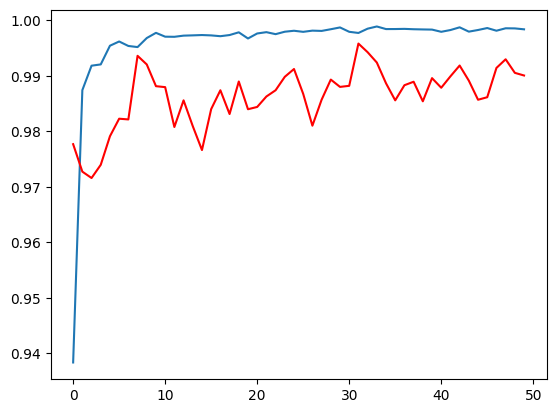

In [30]:
print(av[-1])
plt.plot(ah)
plt.plot(av, c="r")


In [31]:
model.evaluate(x_test / 255, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9892


[0.07325761765241623, 0.9891999959945679]